<div width="100%">
    <img width="100%" src="https://storage.googleapis.com/kaggle-datasets-images/1232095/2056195/3da2fe161c2e35efefa75f990b545d32/dataset-cover.png" />
</div>

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  colab = True
except e:
  colab = False


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
if colab: 
  !pip install transformers
from transformers import AutoTokenizer

from tqdm import tqdm
import tensorflow as tf

import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.6 MB/s eta 0:00:00


<h1 id="dataset" style="color:#black; background:#a6e22d; border:0.5px dotted #black;"> 
    <center>Dataset
        <a class="anchor-link" href="#dataset" target="_self">¶</a>
    </center>
</h1>

In [3]:
def format(file):
  with open(file) as f:
      # read csv file as pandas dataframe
      df = pd.read_csv(f, sep=',', 
                       # names=['Sentence_id', 'Word', 'Tag']
                      )
      # group by sentence_id and create list of words and list of tags
      df = df.groupby('sentence_id').agg({'word': lambda x: list(x), 'tag': lambda x: list(x)})
      # create pair of 2nd and 3rd column (word , tag)
      df['word_tag'] = df.apply(lambda x: list(zip(x['word'], x['tag'])), axis=1)
      # create list of pair of 2nd and 3rd column (word , tag)
      word_tag_list = df['word_tag'].tolist()
      
      return word_tag_list

if colab : file = '/content/drive/MyDrive/NLP_Hackathon_2023/train_generic.csv'
else : file = 'data/train_generic.csv'
samples = format(file)

In [4]:
print(samples[:5])

[[('তার', 'O'), ('মৃত্যুর', 'O'), ('দশ', 'O'), ('দিন', 'O'), ('পর,', 'O'), ('১১৫', 'O'), ('কৃষ্ণাঙ্গ', 'O'), ('উচ্চ', 'O'), ('বিদ্যালয়ের', 'O'), ('শিক্ষার্থীরা', 'O'), ('তার', 'O'), ('হত্যার', 'O'), ('প্রতিবাদে', 'O'), ('ম্যাককম্ব', 'B-LOC'), ('এর', 'O'), ('মাধ্যমে', 'O'), ('মিছিল', 'O'), ('করেছে।', 'O')], [('ব্রাংম্যান', 'O'), ('ডাম্পসন', 'O'), ('১৪০০', 'O'), ('সালে', 'O'), ('আন্তর্জাতিক', 'B-GRP'), ('রেড', 'I-GRP'), ('ক্রস', 'I-GRP'), ('ও', 'I-GRP'), ('রেড', 'I-GRP'), ('ক্রিসেন্ট', 'I-GRP'), ('আন্দোলন', 'I-GRP'), ('এর', 'O'), ('স্বেচ্ছাসেবক', 'O'), ('হিসেবে', 'O'), ('শুরু', 'O'), ('করেছিলেন।', 'O')], [('রাজকীয়', 'O'), ('বাসস্থান', 'O'), ('থেকে', 'O'), ('রাজ্যের', 'O'), ('মন্দির', 'O'), ('পর্যন্ত', 'O'), ('স্বল্প', 'O'), ('দূরত্ব', 'O'), ('ভ্রমণ', 'O'), ('করে,', 'O'), ('রাজা', 'O'), ('মিছিলে', 'O'), ('অনেক', 'O'), ('ধারক', 'O'), ('নিয়ে', 'O'), ('পালকি', 'B-PROD'), ('বসবেন।', 'O')], [('তিনি', 'O'), ('তৃতীয়', 'O'), ('সহস্রাব্দে', 'O'), ('গ্র্যান্ড', 'B-CW'), ('ওলে', 'I-CW'), ('অপ্রি

In [5]:
schema = ['_'] + sorted({tag for sentence in samples 
                             for _, tag in sentence})

In [6]:
print(schema)

['_', 'B-CORP', 'B-CW', 'B-GRP', 'B-LOC', 'B-PER', 'B-PROD', 'I-CORP', 'I-CW', 'I-GRP', 'I-LOC', 'I-PER', 'I-PROD', 'O']


<h1 id="model" style="color:#black; background:#ef60b4; border:0.5px dotted #black;"> 
    <center>Model
        <a class="anchor-link" href="#model" target="_self">¶</a>
    </center>
</h1>

In [7]:
from transformers import AutoConfig, TFAutoModelForTokenClassification , AutoTokenizer

#MODEL_NAME = 'bert-base-cased' 
MODEL_NAME = "csebuetnlp/banglabert"

continue_train = False

config = AutoConfig.from_pretrained(MODEL_NAME, num_labels=len(schema)) 
if continue_train:
  old_model = '/content/drive/MyDrive/NLP_Hackathon_2023/csebuetnlp-banglabert0.3975291115655302.h5'
  model = TFAutoModelForTokenClassification.from_pretrained(old_model, from_pt=False,
                                                           config=config)
else:
  model = TFAutoModelForTokenClassification.from_pretrained(MODEL_NAME , from_pt=True,
                                                           config=config)
# from keras.models import load_model
# model = load_model(old_model)
# model = TFAutoModelForTokenClassification.from_pretrained(model, from_pt=True,
#                                                             config=config)

model.summary()

Downloading:   0%|          | 0.00/586 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraForTokenClassification: ['discriminator_predictions.dense_prediction.weight', 'electra.embeddings.position_ids', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFElectraForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classi

Model: "tf_electra_for_token_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 electra (TFElectraMainLayer  multiple                 110026752 
 )                                                               
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  10766     
                                                                 
Total params: 110,037,518
Trainable params: 110,037,518
Non-trainable params: 0
_________________________________________________________________


In [8]:
#print(samples[:5])

<h1 id="tokenize" style="color:#black; background:#fc9720; border:0.5px dotted #black;"> 
    <center>Tokenize
        <a class="anchor-link" href="#tokenize" target="_self">¶</a>
    </center>
</h1>

In [9]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def tokenize_sample(sample):
    seq = [
               (subtoken, tag)
               for token, tag in sample
               for subtoken in tokenizer(token)['input_ids'][1:-1]
           ]
    return [(3, 'O')] + seq + [(4, 'O')]

def preprocess(samples):
    tag_index = {tag: i for i, tag in enumerate(schema)}
    tokenized_samples = list(tqdm(map(tokenize_sample, samples)))
    max_len = max(map(len, tokenized_samples))
    X = np.zeros((len(samples), max_len), dtype=np.int32)
    y = np.zeros((len(samples), max_len), dtype=np.int32)
    for i, sentence in enumerate(tokenized_samples):
        for j, (subtoken_id, tag) in enumerate(sentence):
            X[i, j] = subtoken_id
            y[i,j] = tag_index[tag]
    return X, y

X, y = preprocess(samples)
print(X[:2] , y[:2])

# split into train and test
from sklearn.model_selection import train_test_split
#train_samples, test_samples = train_test_split(X , y, test_size=0.2, random_state=42 )
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42 )
# X_train, y_train = preprocess(train_samples)
# X_test, y_test = preprocess(test_samples)

if colab: file = '/content/drive/MyDrive/NLP_Hackathon_2023/dev_generic.csv'
else : file = 'data/dev_generic.csv'

dev_samples = format(file)
X_valid, y_valid = preprocess(dev_samples)

Downloading:   0%|          | 0.00/119 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

15300it [00:10, 1411.13it/s]


[[    3   826  3163  1866  1001   804    16 25193 23291  2353  6880  7057
    826  4803  7666  7421  1321   786   919  1744  4781  1333   205     4
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [    3 18209   434  2342 23546   843  3611 19972   489  1460  2760  8280
  11686   219  8280 11501  1290  3229   919 17287  1365  1116  2494   205
      4     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]] [[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13  4  4  4 13 13 13 13 13 13
   0  0  0  0  0  0  0  0  0  0  0 

800it [00:01, 752.11it/s]


In [10]:
y_valid.shape

(800, 46)

In [11]:
y_test.shape

(3060, 72)

In [12]:
from keras import backend as K

# def f1(y_true, y_pred):
#     def recall(y_true, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#         recall = true_positives / (possible_positives + K.epsilon())
#         return recall

#     def precision(y_true, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision

#     precision = precision(y_true, y_pred)
#     recall = recall(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Define F1 measures: F1 = 2 * (precision * recall) / (precision + recall)

def custom_f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))


<h1 id="training" style="color:#black; background:#bababa; border:0.5px dotted #black;"> 
    <center>Training
        <a class="anchor-link" href="#training" target="_self">¶</a>
    </center>
</h1>

In [14]:
EPOCHS=35
BATCH_SIZE=28

optimizer = tf.keras.optimizers.Adam(lr=0.000001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, 
              metrics=["accuracy" , 
              # tf.keras.metrics.Precision(name="precision")
              ]
              #metrics = "accuracy"
)
history = model.fit(tf.constant(X_train), tf.constant(y_train),
                    validation_data=(X_test, y_test), 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE)

Epoch 1/35
438/438 [==============================] - 212s 448ms/step - loss: 0.5957 - accuracy: 0.8838 - val_loss: 0.3155 - val_accuracy: 0.9451
Epoch 2/35
438/438 [==============================] - 193s 441ms/step - loss: 0.2983 - accuracy: 0.9491 - val_loss: 0.2351 - val_accuracy: 0.9502
Epoch 3/35
438/438 [==============================] - 193s 441ms/step - loss: 0.2379 - accuracy: 0.9503 - val_loss: 0.2042 - val_accuracy: 0.9505
Epoch 4/35
438/438 [==============================] - 193s 441ms/step - loss: 0.2120 - accuracy: 0.9509 - val_loss: 0.1879 - val_accuracy: 0.9544
Epoch 5/35
438/438 [==============================] - 193s 441ms/step - loss: 0.1955 - accuracy: 0.9541 - val_loss: 0.1758 - val_accuracy: 0.9564
Epoch 6/35
438/438 [==============================] - 193s 441ms/step - loss: 0.1812 - accuracy: 0.9574 - val_loss: 0.1633 - val_accuracy: 0.9578
Epoch 7/35
438/438 [==============================] - 193s 441ms/step - loss: 0.1677 - accuracy: 0.9601 - val_loss: 0.1500 -

In [ ]:
#!pip list | grep tensorflow

<h1 id="results" style="color:#black; background:#2fbbab; border:0.5px dotted #black;"> 
    <center>Results
        <a class="anchor-link" href="#results" target="_self">¶</a>
    </center>
</h1>

## Training results

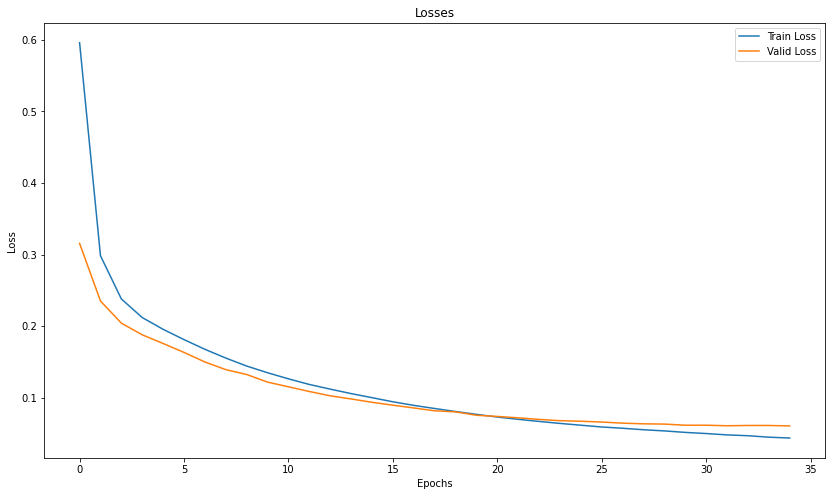

In [15]:
plt.figure(figsize=(14,8))
plt.title('Losses')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


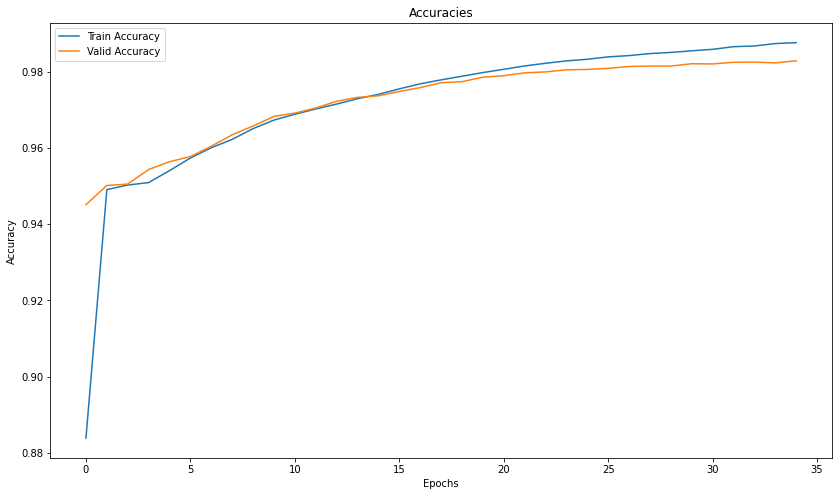

In [16]:
plt.figure(figsize=(14,8))
plt.title('Accuracies')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Valid Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Validation results

In [17]:


[loss, accuracy] = model.evaluate(X_valid, y_valid)
print("Loss:%1.3f, Accuracy:%1.3f" % (loss, accuracy))

# Find the f1 score of the model output
from sklearn.metrics import f1_score
y_pred = model.predict(X_valid).logits
y_pred = np.argmax(y_pred, axis=-1)
y_pred = y_pred.reshape(-1)
y_pred = y_pred.flatten().squeeze()
y_valid = y_valid.flatten().squeeze()
f1 = f1_score(y_valid, y_pred, average='macro')

25/25 [==============================] - 5s 103ms/step - loss: 0.1022 - accuracy: 0.9723
Loss:0.102, Accuracy:0.972
25/25 [==============================] - 4s 90ms/step


In [18]:
print(f1)

0.7350135860236243


In [19]:
if colab : model.save_weights('/content/drive/MyDrive/NLP_Hackathon_2023/'+MODEL_NAME.replace('/' , '-')+str(f1)+'.h5')
else : model.save_weights('../'+MODEL_NAME.replace('/' , '-')+ str(f1)+'.h5')